In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from spectroscopy.spectral_features import calculate_log_rhk, calculate_log_ro

_DATA_FOLDER = Path.cwd() / "data"
_STAR_DATA = _DATA_FOLDER / "star_data.csv"
_CONTINUUM_NORMALIZED_FILE = _DATA_FOLDER / "out/3_continuum_corrected_spectra.npz"

_spectra = dict(np.load(_CONTINUUM_NORMALIZED_FILE))
_star_data = pd.read_csv(_STAR_DATA, index_col="name")

# Compare $R_{HK}$ and $Ro$
TODO: Fix calculation of $R_{HK}$ and compare their log values

In [2]:
rhk_data = []
ro_data = []

for _target, _data in _spectra.items():
    b_v = _star_data.loc[_target, "b_v"]
    p_rot = _star_data.loc[_target, "prot"]
    rhk = calculate_log_rhk(_data, b_v)
    ro = calculate_log_ro(b_v, p_rot)
    rhk_data.append(rhk)
    ro_data.append(ro)
    
    print(_target)
    print(f"\t - R_HK: {rhk}")
    print(f"\t - Ro: {ro}")

BECet
	 - R_HK: -4.408733720445109
	 - Ro: 1.9538001383917
EXCet
	 - R_HK: -4.369887059760544
	 - Ro: 2.1173119697852365
HNPeg
	 - R_HK: -4.438991983833249
	 - Ro: 1.6122263767182932
V383Lac
	 - R_HK: -4.221126236539966
	 - Ro: 1.6977332885247534
V453And
	 - R_HK: -4.301698936106619
	 - Ro: 2.173368816554512
V774Tau
	 - R_HK: -4.529745627840968
	 - Ro: 1.9173497177866574
V834Tau
	 - R_HK: -4.133804628304726
	 - Ro: 1.9731231916536227
V889Her
	 - R_HK: -4.059396456305558
	 - Ro: 0.9368055990349844


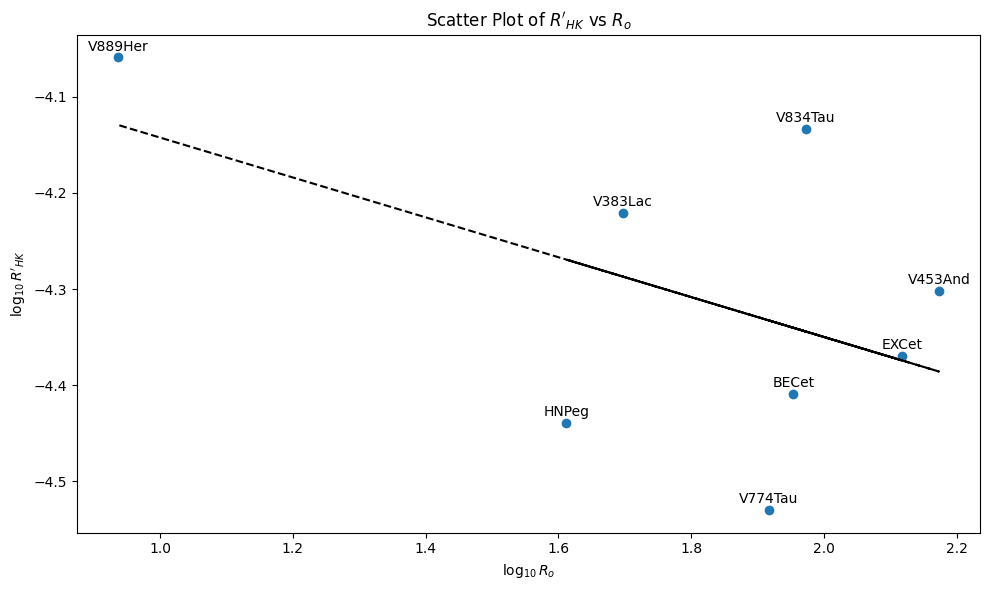

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(ro_data, rhk_data)
for i, target in enumerate(_spectra.keys()):
    plt.annotate(target, (ro_data[i], rhk_data[i]), textcoords="offset points", xytext=(0,5), ha='center')
coef = np.polyfit(ro_data, rhk_data, 1)
linear = np.poly1d(coef)
plt.plot(ro_data, linear(ro_data), '--k')
plt.xlabel(r'$\log_{10}{R_o}$')
plt.ylabel(r"$\log_{10}{R'_{HK}}$")
plt.title(r"Scatter Plot of $R'_{HK}$ vs $R_o$")
plt.tight_layout()